<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonMachineLearning/blob/main/product_Tree_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree 실습

1. product_tree_작성자이름.ipynb
2. 탐색적 데이터 분석 및 시각화
3. train_Test_split - 7:3, 2045 적용
4. DecisionTreeClassifier수행
5. y -> customerType ('Online','Offline')
6. Mertic -> Accuracy, F1 - Score
7. LogisticRegression 결과와 비교



### 1. 데이터 살펴보기

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15009 non-null  object 
 1   meanPriceEach  15009 non-null  float64
 2   totalOrder     15009 non-null  float64
 3   orderType_1    15009 non-null  float64
 4   orderType_2    15009 non-null  float64
 5   orderType_3    15009 non-null  float64
 6   totalBundle    15009 non-null  float64
 7   bundleType_1   15009 non-null  float64
 8   bundleType_2   15009 non-null  float64
 9   customerType   15009 non-null  object 
 10  FY             15009 non-null  int64  
 11  Country        15009 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.4+ MB


In [4]:
DF.head()

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25


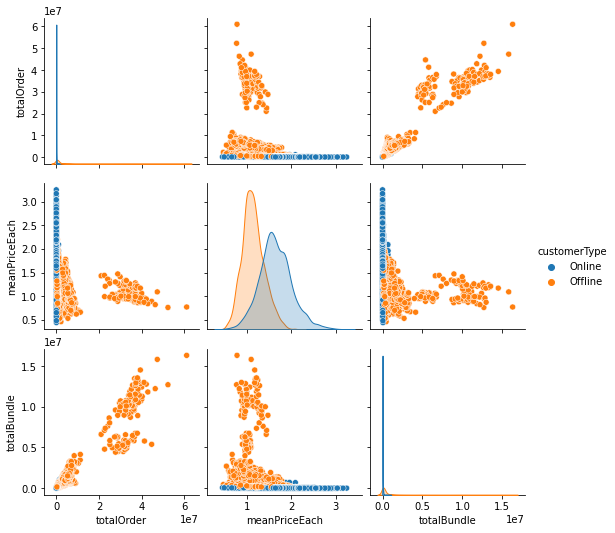

In [5]:
sns.pairplot(DF, hue = 'customerType', vars = ['totalOrder','meanPriceEach','totalBundle'])
plt.show()

시각화 결과로 보았을 땐 meanPriceEach가 가장 적절해보임

Logistic Regression과 Decision Tree 모두 위 세가지 변수를 사용해보기.(변수를 같게해서 비교)

### 2. Data split
 
훈련 데이터와 테스트 데이터의 비율은 7:3

random_state는 결과비교를 위해 2045로 지정

In [6]:
X = DF[['meanPriceEach','totalOrder','totalBundle']]
y = DF['customerType']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (10506, 3) (10506,)
Test Data :  (4503, 3) (4503,)


### 3. Modeling

> * Logistic Regression 

In [8]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_hat_lr = Model_lr.predict(X_test)

y_hat_lr

array(['Offline', 'Offline', 'Offline', ..., 'Offline', 'Online',
       'Online'], dtype=object)

> * Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

#max_depth가 2일때 91%의 Accuracy고, 3부터 93%이상이 나온다.
Model_dt = DecisionTreeClassifier(max_depth = 3,
                                  random_state = 2045)
Model_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

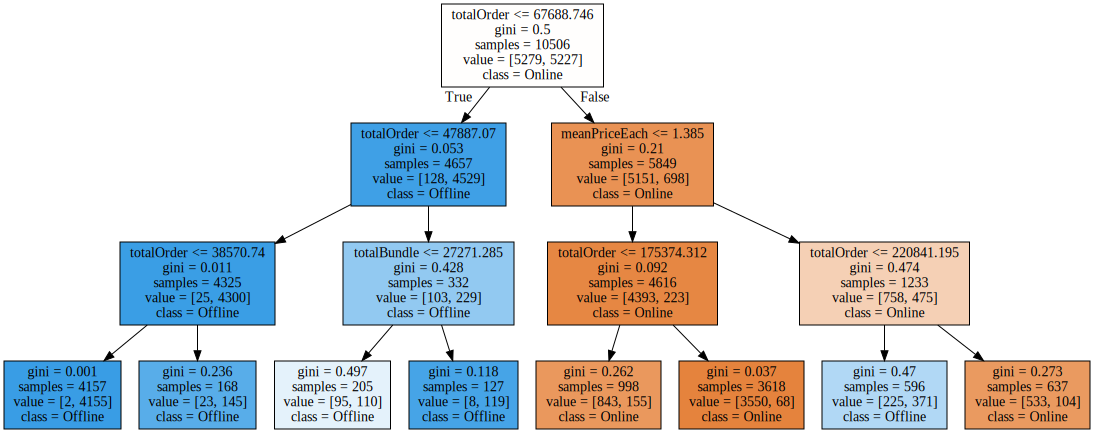

In [11]:
#시각화
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_dt,
                                class_names = (['Online','Offline']),
                                feature_names = (['meanPriceEach','totalOrder','totalBundle']),
                                filled = True))

In [12]:
y_hat_dt = Model_dt.predict(X_test)

y_hat_dt

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online',
       'Offline'], dtype=object)

### 4. Model Validation

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score

> * Logistic Regression의 Accuracy

In [14]:
confusion_matrix(y_test, y_hat_lr, labels = ['Online','Offline'])

array([[ 749, 1527],
       [  30, 2197]])

In [15]:
print(accuracy_score(y_test,y_hat_lr))

0.654230512991339


> * Logistic Regression의 F1_Score

In [16]:
f1_score(y_test, y_hat_lr, pos_label = 'Online')

0.4903436988543371

In [17]:
f1_score(y_test, y_hat_lr, pos_label = 'Offline')

0.7383633002856662

> * Decision Tree의 Accuracy

In [18]:
confusion_matrix(y_test, y_hat_dt)

array([[2055,  172],
       [ 137, 2139]])

In [19]:
print(accuracy_score(y_test,y_hat_dt))

0.9313790806129247


> * Decision Tree의 F1_Score

In [20]:
f1_score(y_test, y_hat_dt, average = None)

array([0.93007468, 0.93263571])

### 4. Logistic Regression VS Decision Tree
> * accuracy 비교

In [21]:
print('lr모델 Accuracy : ', accuracy_score(y_test,y_hat_lr))
print('dt모델 Accuracy : ', accuracy_score(y_test,y_hat_dt))

lr모델 Accuracy :  0.654230512991339
dt모델 Accuracy :  0.9313790806129247


위 비교를 바탕으로, 

product.csv에서 X를 'meanPriceEach','totalOrder','totalBundle'로 설정하여 y인 'customerType'을 분류할 때, 

Logistic Regression보다 Decision Tree가 더 유리하다고 생각한다.